In [1]:
import csv
from defs import *
from scipy import *
import numpy as np
import scipy
import gc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.lines import Line2D
import pandas as pd
import math
from matplotlib import pyplot as plt
from funciones import *
#initialization of lists for checking

variance =[]
integral = []
polar_integral = []

kp = 4; omegap = (1*kp)**0.5

def spectrum_integration(eta, N,L,CHECK=False):
    
    """ 
    Input : 
        - eta
        - N : number of points
        - L : length domain
    
    Ouput :
        - k , kx , ky , theta : wavenumber vector , his components in x and y , angle theta 
        - F_center: F(kx, ky)
        - F_center_polar: F(k,theta)
        - F_center_polar_integrated : F(k) (azimuthal integration of the 2D spectrum)
        - k_tile , theta_tile : mesh in (k,theta)
        - kxp_tile, kyp_tile : mesh in (kx,ky) from (k,theta)
        - variance, integral, polar_integral : list for checking 
    
    """
    
    varr =  np.var(eta)
    if CHECK: print('var', varr)
    #variance.append(varr)
    
    #print('mean', np.mean(eta))
    
    wavenumber =  2*np.pi*np.fft.fftfreq(N,L/N)
    kx = np.fft.fftshift(wavenumber); ky = kx
    kx_tile, ky_tile = np.meshgrid(kx,ky)
    
    theta = np.linspace(-np.pi,np.pi, 100)
    
    #xs = 2*m.pi ; ys=xs
    #rmax = (xs**2 + ys**2)**0.5
    #radii = np.linspace(0, rmax, 100, endpoint=True)
    
    
    k = wavenumber[0:int(N/2)]
    dkx = kx[1] - kx[0]; dky = ky[1] - ky[0]
    dk = k[1]-k[0]; dtheta = theta[1]-theta[0]
    
    spectrum = np.fft.fft2(eta/(N*N)**0.5) # FFT normalization 
    F = np.absolute(spectrum)**2/N**2/(dkx*dky) # Per area normalization -> F(kx,ky)
    
    if CHECK: print ('sum F', np.sum(F))
    F_center = np.fft.fftshift(F,axes=(0,1)) # Further normalization by independent variables
    
    k_tile, theta_tile = np.meshgrid(k,theta)
    kxp_tile, kyp_tile = pol2cart(k_tile, theta_tile)
    
    
    
    integ = np.sum(F_center)*dkx*dky # F
    if CHECK: print('integral',integ)
    #integral.append(integ)
    
    
    F_center_polar = scipy.interpolate.griddata((kx_tile.ravel(),ky_tile.ravel()), F_center.ravel(), (kxp_tile, kyp_tile), method='nearest', fill_value=0) #F(k,theta)
    
    F_center_polar_integrated = np.sum(F_center_polar*k_tile, axis=0)*dtheta # Azimuthal integration
    int_pol = np.sum(F_center_polar_integrated)*dk # F
    if CHECK: print ('sum polar integrated', int_pol)
    
    
    if CHECK: print('F center', F_center.shape , 'F polar', F_center_polar.shape , 'F center polar integrated' , F_center_polar_integrated.shape)
    
    #polar_integral.append(int_pol)
    
    return k, F_center, F_center_polar_integrated , F_center_polar , k_tile, kxp_tile, kyp_tile , theta_tile , theta , varr, integ, int_pol , kx, ky

In [2]:
# Cargar eta_series desde un archivo .npy
eta_series_L10 = np.load('eta_series_kpHs0p16_uoc0p50.npy', allow_pickle=True)
print(eta_series_L10.shape)

work_dir_L10 = '/projects/DEIKE/nscapin/broadband/kpHs0p16_uoc0p50/'

# Leer el archivo de texto
data_L10 = np.loadtxt(work_dir_L10+'eta/global_int.out')

# Obtener la segunda columna
istep_c_L10 =data_L10[:, 1]
#print(istep_c.shape[0])
time_L10 = data_L10[:,0] 
#print(time)

(473, 512, 512)


In [3]:
# Cargar eta_series desde un archivo .npy
eta_series_L11 = np.load('eta_series_kpHs0p16_uoc0p50_L11.npy', allow_pickle=True)
print(eta_series_L11.shape)

work_dir_L11 = '/projects/DEIKE/nscapin/broadband/re720_bo0200_P0p16_uoc0p50_L11/'

# Leer el archivo de texto
data_L11 = np.loadtxt(work_dir_L11+'eta/global_int.out')

# Obtener la segunda columna
istep_c_L11 =data_L11[:, 1]
#print(istep_c.shape[0])
time_L11 = data_L11[:,0] 
#print(time)

(265, 1024, 1024)


In [4]:

#initialization of lists for checking

variance =[]
integral = []
polar_integral = []

kp = 4; omegap = (1*kp)**0.5

def spectrum_integration(eta, N,L,CHECK=False):
    
    """ 
    Input : 
        - eta
        - N : number of points
        - L : length domain
    
    Ouput :
        - k , kx , ky , theta : wavenumber vector , his components in x and y , angle theta 
        - F_center: F(kx, ky)
        - F_center_polar: F(k,theta)
        - F_center_polar_integrated : F(k) (azimuthal integration of the 2D spectrum)
        - k_tile , theta_tile : mesh in (k,theta)
        - kxp_tile, kyp_tile : mesh in (kx,ky) from (k,theta)
        - variance, integral, polar_integral : list for checking 
    
    """
    
    varr =  np.var(eta)
    if CHECK: print('var', varr)
    #variance.append(varr)
    
    #print('mean', np.mean(eta))
    
    wavenumber =  2*np.pi*np.fft.fftfreq(N,L/N)
    kx = np.fft.fftshift(wavenumber); ky = kx
    kx_tile, ky_tile = np.meshgrid(kx,ky)
    
    theta = np.linspace(-np.pi,np.pi, 100)
    
    #xs = 2*m.pi ; ys=xs
    #rmax = (xs**2 + ys**2)**0.5
    #radii = np.linspace(0, rmax, 100, endpoint=True)
    
    
    k = wavenumber[0:int(N/2)]
    dkx = kx[1] - kx[0]; dky = ky[1] - ky[0]
    dk = k[1]-k[0]; dtheta = theta[1]-theta[0]
    
    spectrum = np.fft.fft2(eta/(N*N)**0.5) # FFT normalization 
    F = np.absolute(spectrum)**2/N**2/(dkx*dky) # Per area normalization -> F(kx,ky)
    
    if CHECK: print ('sum F', np.sum(F))
    F_center = np.fft.fftshift(F,axes=(0,1)) # Further normalization by independent variables
    
    k_tile, theta_tile = np.meshgrid(k,theta)
    kxp_tile, kyp_tile = pol2cart(k_tile, theta_tile)
    
    
    
    integ = np.sum(F_center)*dkx*dky # F
    if CHECK: print('integral',integ)
    #integral.append(integ)
    
    
    F_center_polar = scipy.interpolate.griddata((kx_tile.ravel(),ky_tile.ravel()), F_center.ravel(), (kxp_tile, kyp_tile), method='nearest', fill_value=0) #F(k,theta)
    
    F_center_polar_integrated = np.sum(F_center_polar*k_tile, axis=0)*dtheta # Azimuthal integration
    int_pol = np.sum(F_center_polar_integrated)*dk # F
    if CHECK: print ('sum polar integrated', int_pol)
    
    
    if CHECK: print('F center', F_center.shape , 'F polar', F_center_polar.shape , 'F center polar integrated' , F_center_polar_integrated.shape)
    
    #polar_integral.append(int_pol)
    
    return k, F_center, F_center_polar_integrated , F_center_polar , k_tile, kxp_tile, kyp_tile , theta_tile , theta , varr, integ, int_pol , kx, ky

No handles with labels found to put in legend.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


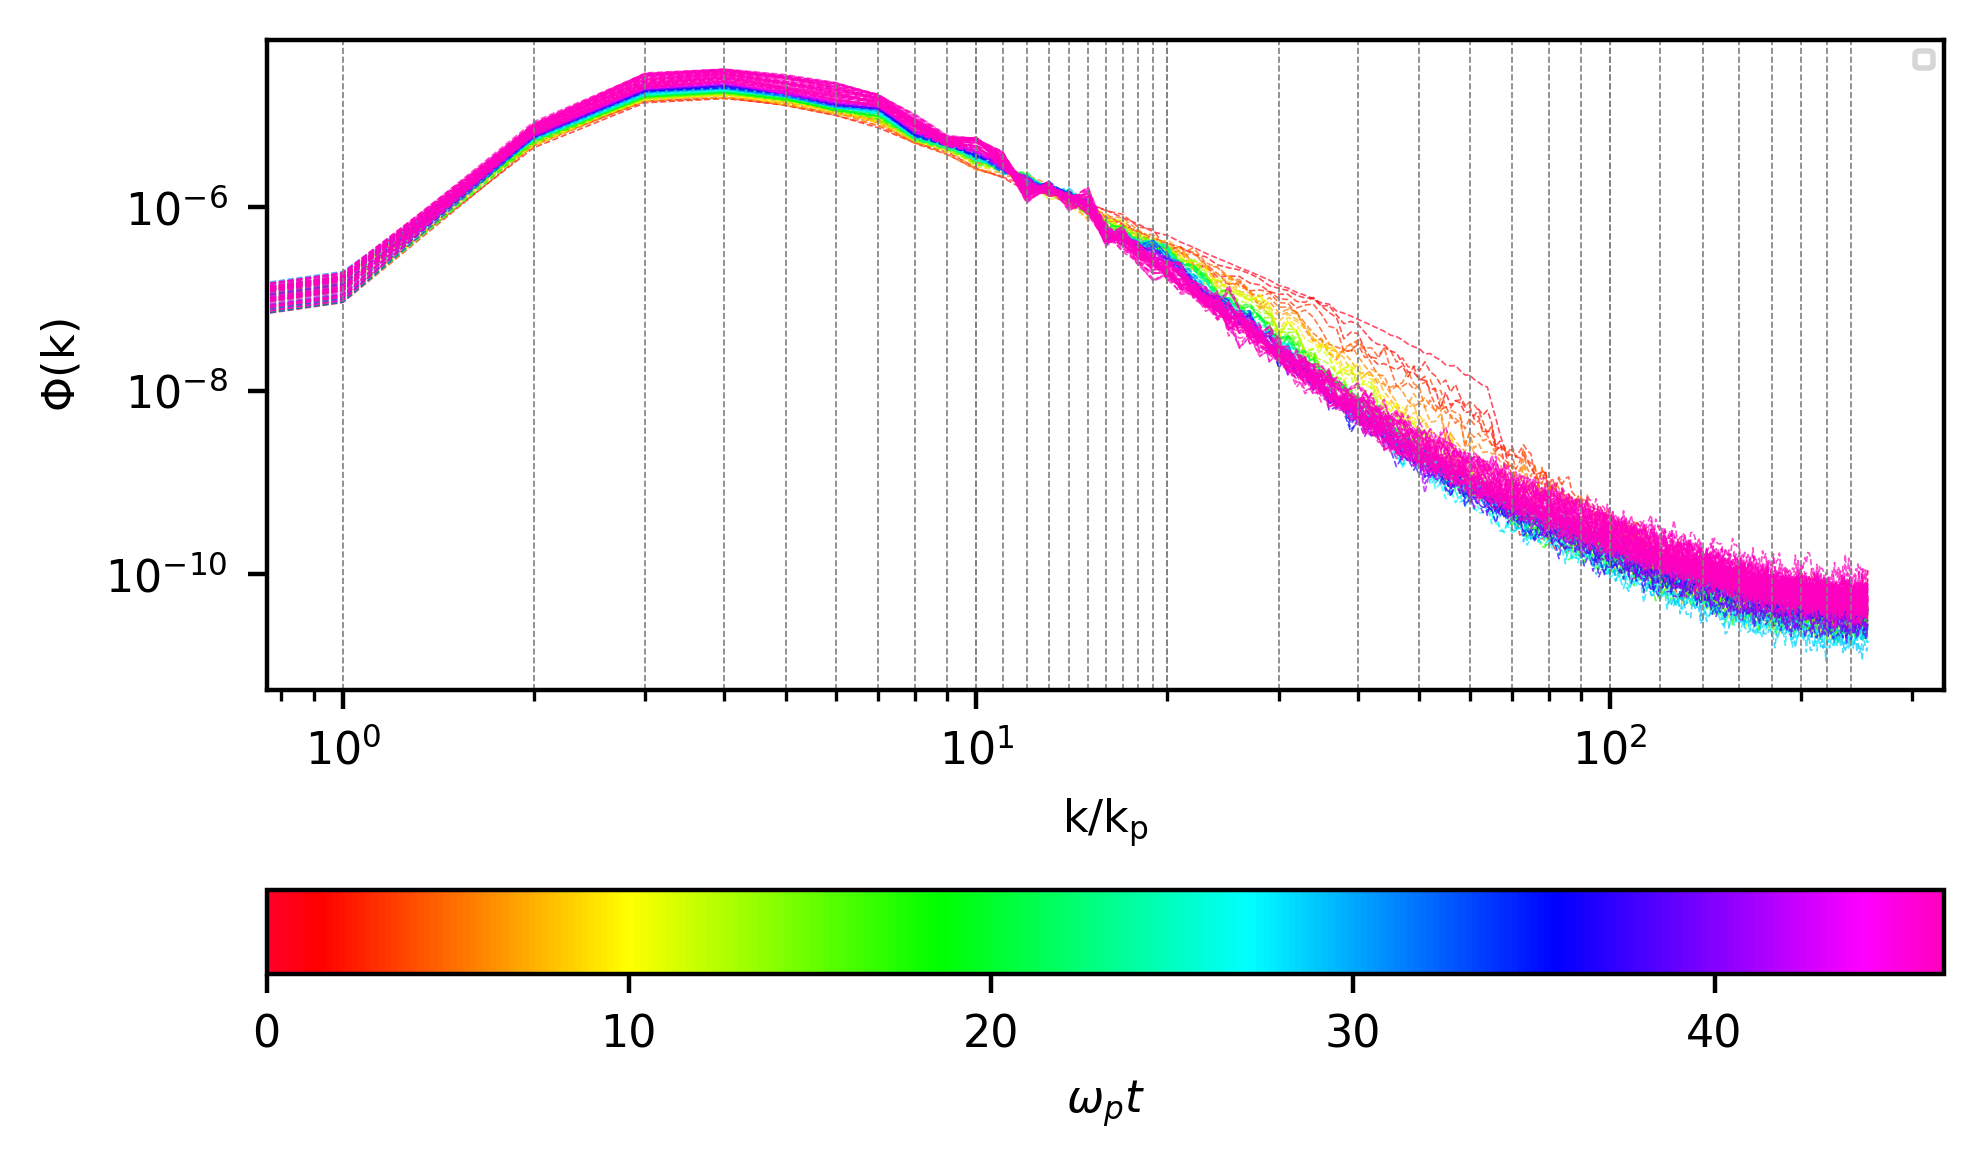

In [5]:
import matplotlib.cm as cm
from scipy.interpolate import interp1d
color_map = plt.cm.gist_rainbow
fig = plt.figure(figsize=[5, 3])
ax = fig.gca()

num_rows = 2
num_cols = 3

kp = 4

N = 512
L = 2 * np.pi

j = 0




variance_L10 = []
integral_L10 = []
polar_integral_L10 = []

# modes growth
energy_mode_L10 = []
coordx_mode_L10 = []

filtered_coordx_mode = []
filtered_energy_mode = []

for i in range(len(eta_series_L10)):
    eta = eta_series_L10[i]

    k, F_center, F_center_polar_integrated, F_center_polar, k_tile, kxp_tile, kyp_tile, theta_tile, theta, variance, integral, polar_integral, kx, ky = spectrum_integration(
        eta - np.mean(eta), N, L, CHECK=False)
    dk = k[1] - k[0]
    #print(k)
    if i == 0:

        indices1 = np.arange(0, np.where(k >= 1)[0][0], max(1, int(0.25 / dk)))
        indices10 = np.arange(np.where(k >= 1)[0][0], np.where(k >= 10)[0][0], max(1, int(1 / dk)))
        indices1020 = np.arange(np.where(k >= 10)[0][0], np.where(k > 20)[0][0], max(1, int(1 / dk)))
        indices100 = np.arange(np.where(k >= 10)[0][0], np.where(k > 100)[0][0], max(1, int(10/ dk)))
        indicesplus = np.arange(np.where(k >= 100)[0][0], len(k), max(1, int(20 / dk)))

        k_multiples = np.concatenate((indices1, indices10, indices1020 ,indices100, indicesplus))

        k_multiples = k_multiples.astype(int)
        # Obtener los valores de k y las energías correspondientes
        k_seleccionados = k[k_multiples]

    energias_correspondientes_L10 = F_center_polar_integrated[k_multiples]

    
    if i == 0:
        E0_both_L10 = np.sum(F_center_polar_integrated) * dk
        #print(type(indices_cada_diez))
        E0_nodes_both = F_center_polar_integrated[k_multiples]
        #E0_second_both =  F_center_polar_integrated[k_second]
    
    if i % 5 == 0:
        psd = ax.plot(k, F_center_polar_integrated, '--', color=plt.cm.get_cmap('gist_rainbow')(j), alpha=0.7, linewidth=0.3)
    
    
    energy_mode_L10.append(energias_correspondientes_L10.tolist())
    #coordx_mode.append(coordx.tolist())
    
    integral_L10.append(integral)
    j += 1

# plot where are the nodes

for km in k_seleccionados:
    plt.axvline(x=km, color='gray', linestyle='--', linewidth=0.3)
    
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(loc='upper right', fontsize=4)


color_values =  (np.array(time_L10)-time_L10[0])

# Now set the normalization with the correct range

norm = plt.Normalize(vmin=color_values.min(), vmax=color_values.max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])  

# Add the colorbar to the figure
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.2)

# Set colorbar label and other properties if needed
cbar.set_label('$\omega_{p} t$')


fig.tight_layout()
cbar.set_label('$\omega_{p} t$')
plt.xscale('log')
#plt.xlim([0,10])
#plt.ylim([10**-8,1])
plt.yscale('log')
plt.xlabel('$\mathdefault{k/k_{p}}$')
plt.ylabel('$\mathdefault{\Phi(k)}$')
fig.tight_layout()

No handles with labels found to put in legend.


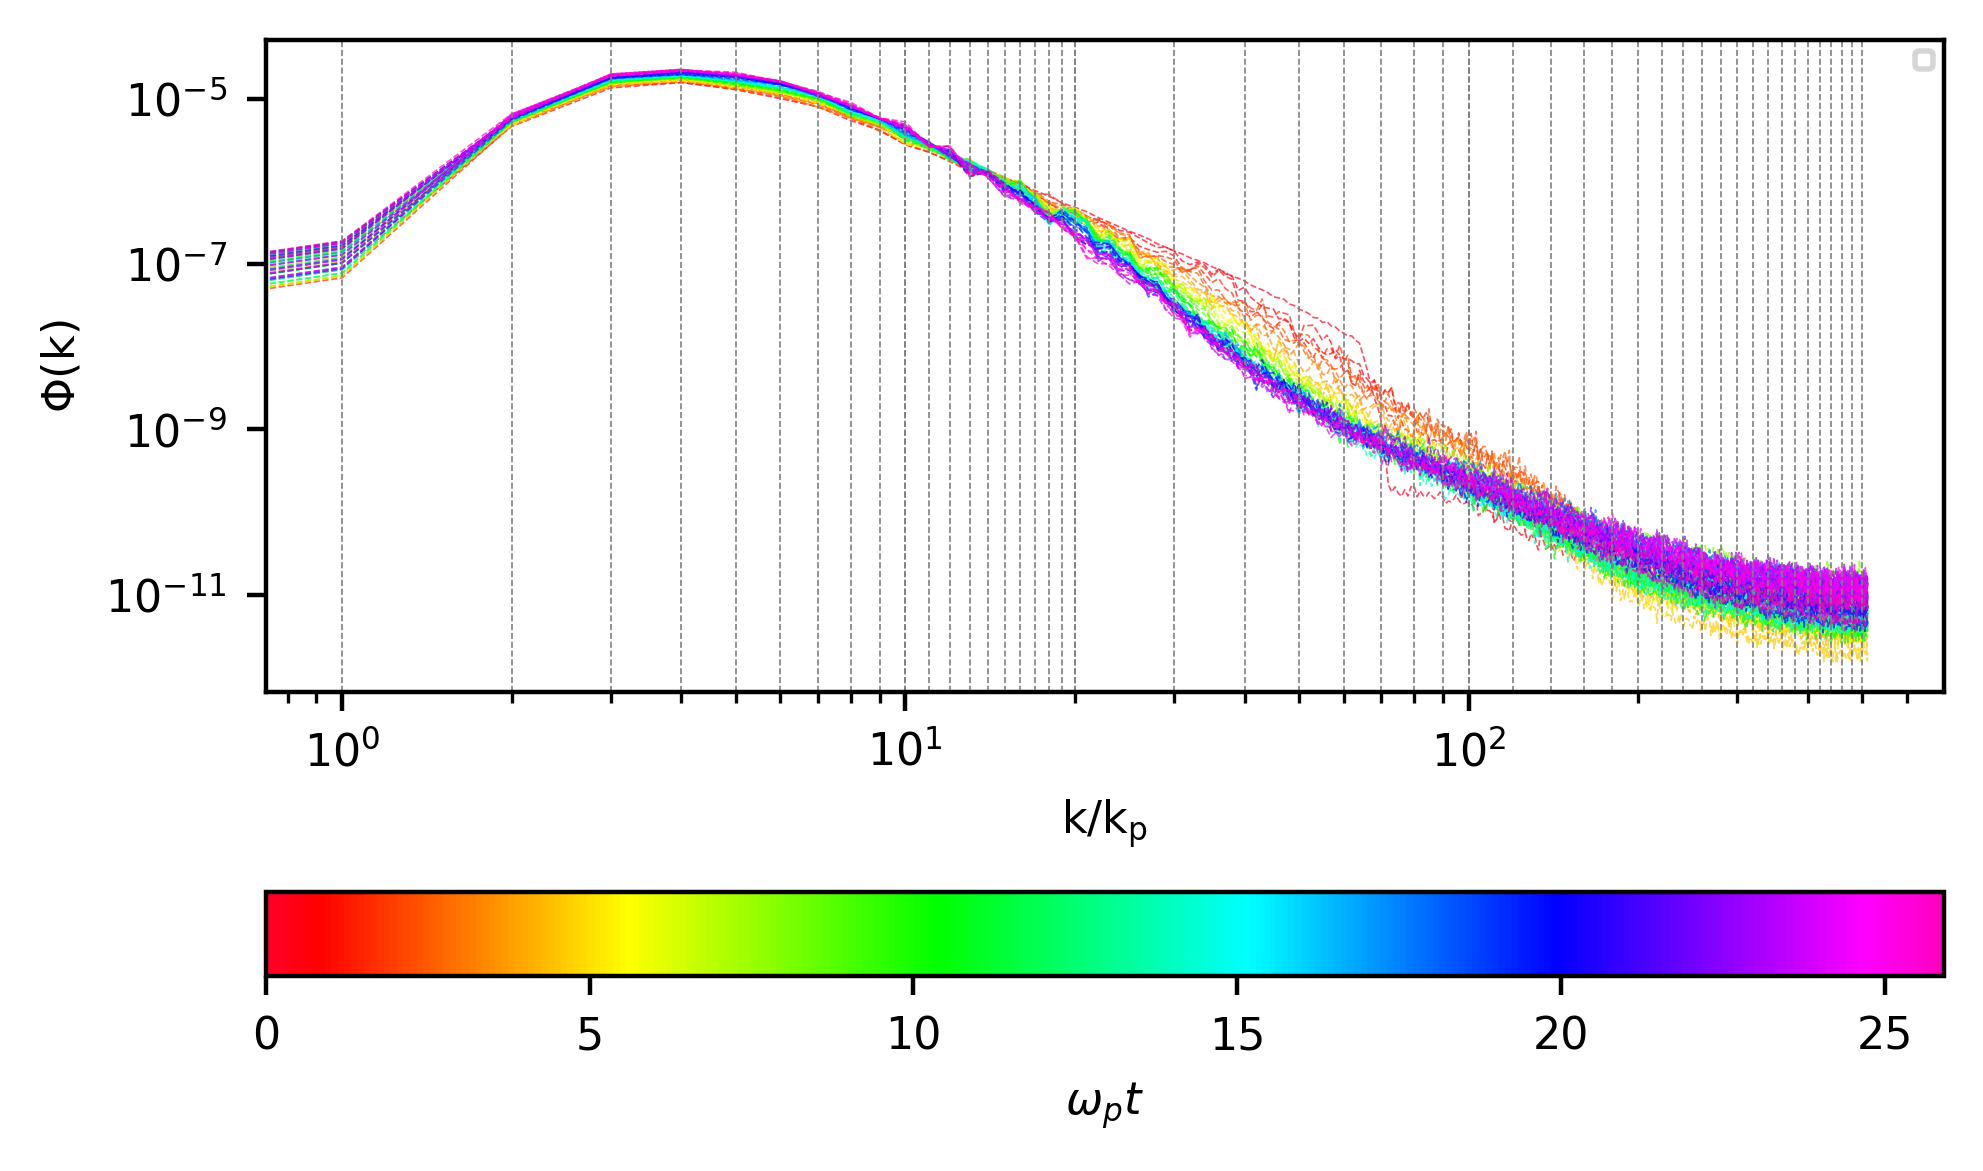

In [6]:
import matplotlib.cm as cm
from scipy.interpolate import interp1d
color_map = plt.cm.gist_rainbow
fig = plt.figure(figsize=[5, 3])
ax = fig.gca()

num_rows = 2
num_cols = 3

kp = 4

N = 1024
L = 2 * np.pi

j = 0

variance_L11 = []
integral_L11 = []
polar_integral_L11 = []

# modes growth
energy_mode_L11 = []
coordx_mode_L11 = []

filtered_coordx_mode = []
filtered_energy_mode = []

for i in range(len(eta_series_L11)):
    eta = eta_series_L11[i]

    k, F_center, F_center_polar_integrated, F_center_polar, k_tile, kxp_tile, kyp_tile, theta_tile, theta, variance, integral, polar_integral, kx, ky = spectrum_integration(
        eta - np.mean(eta), N, L, CHECK=False)
    dk = k[1] - k[0]
    #print(k)
    if i == 0:

        indices1 = np.arange(0, np.where(k >= 1)[0][0], max(1, int(0.25 / dk)))
        indices10 = np.arange(np.where(k >= 1)[0][0], np.where(k >= 10)[0][0], max(1, int(1 / dk)))
        indices1020 = np.arange(np.where(k >= 10)[0][0], np.where(k > 20)[0][0], max(1, int(1 / dk)))
        indices100 = np.arange(np.where(k >= 10)[0][0], np.where(k > 100)[0][0], max(1, int(10/ dk)))
        indicesplus = np.arange(np.where(k >= 100)[0][0], len(k), max(1, int(20 / dk)))

        k_multiples = np.concatenate((indices1, indices10, indices1020 ,indices100, indicesplus))

        k_multiples = k_multiples.astype(int)
        # Obtener los valores de k y las energías correspondientes
        k_seleccionados = k[k_multiples]

    energias_correspondientes_L11 = F_center_polar_integrated[k_multiples]

    
    if i == 0:
        E0_both_L11 = np.sum(F_center_polar_integrated) * dk
        #print(type(indices_cada_diez))
        E0_nodes_both = F_center_polar_integrated[k_multiples]
        #E0_second_both =  F_center_polar_integrated[k_second]
    
    if i % 5 == 0:
        psd = ax.plot(k, F_center_polar_integrated, '--', color=plt.cm.get_cmap('gist_rainbow')(j), alpha=0.7, linewidth=0.3)
    
    
    energy_mode_L11.append(energias_correspondientes_L11.tolist())
    #coordx_mode.append(coordx.tolist())
    
    integral_L11.append(integral)
    j += 1

# plot where are the nodes

for km in k_seleccionados:
    plt.axvline(x=km, color='gray', linestyle='--', linewidth=0.3)
    
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(loc='upper right', fontsize=4)


color_values =  (np.array(time_L11)-time_L11[0])

# Now set the normalization with the correct range

norm = plt.Normalize(vmin=color_values.min(), vmax=color_values.max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])  

# Add the colorbar to the figure
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.2)

# Set colorbar label and other properties if needed
cbar.set_label('$\omega_{p} t$')


fig.tight_layout()
cbar.set_label('$\omega_{p} t$')
plt.xscale('log')
#plt.xlim([0,10])
#plt.ylim([10**-8,1])
plt.yscale('log')
plt.xlabel('$\mathdefault{k/k_{p}}$')
plt.ylabel('$\mathdefault{\Phi(k)}$')
fig.tight_layout()

In [7]:
# Cargar eta_series desde un archivo .npy
eta_series_L11_uc25 = np.load('eta_series_kpHs0p16_uoc0p25_L11.npy', allow_pickle=True)
print(eta_series_L11_uc25.shape)

work_dir_L11_uc25 = '/projects/DEIKE/nscapin/broadband/re720_bo0200_P0p16_uoc0p25_L11/'

# Leer el archivo de texto
data_L11_uc25 = np.loadtxt(work_dir_L11_uc25+'eta/global_int.out')

# Obtener la segunda columna
istep_c_L11_uc25 =data_L11_uc25[:, 1]
#print(istep_c.shape[0])
time_L11_uc25 = data_L11_uc25[:,0] 
#print(time)

(445, 1024, 1024)


In [8]:
# Cargar eta_series desde un archivo .npy
eta_series_L10_uc25 = np.load('eta_series_kpHs0p16_uoc0p25.npy', allow_pickle=True)
print(eta_series_L10_uc25.shape)

work_dir_L10_uc25 = '/projects/DEIKE/nscapin/broadband/kpHs0p16_uoc0p25/'

# Leer el archivo de texto
data_L10_uc25 = np.loadtxt(work_dir_L10_uc25+'eta/global_int.out')

# Obtener la segunda columna
istep_c_L10_uc25 =data_L10_uc25[:, 1]
#print(istep_c.shape[0])
time_L10_uc25 = data_L10_uc25[:,0] 
#print(time)

(551, 512, 512)


No handles with labels found to put in legend.


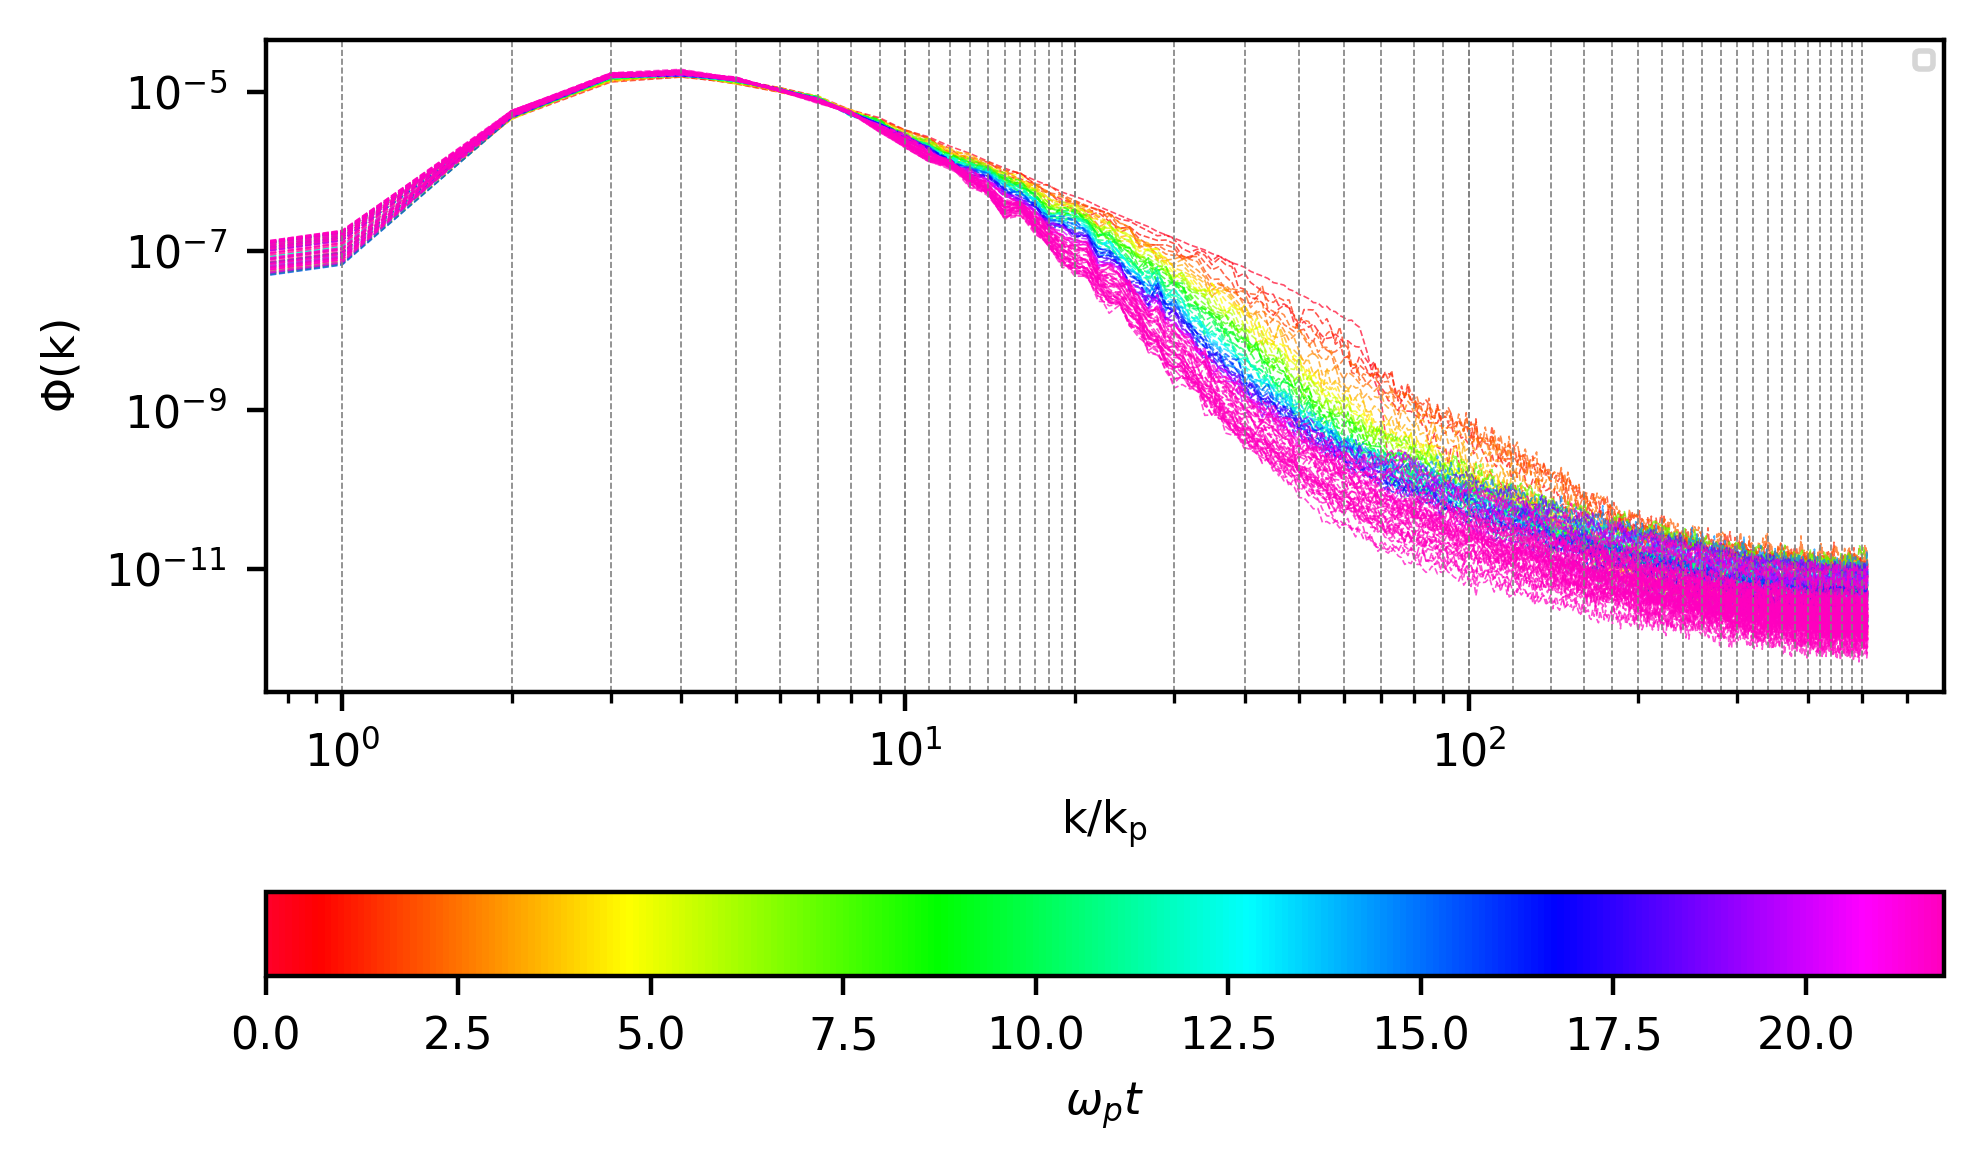

In [9]:
import matplotlib.cm as cm
from scipy.interpolate import interp1d
color_map = plt.cm.gist_rainbow
fig = plt.figure(figsize=[5, 3])
ax = fig.gca()

num_rows = 2
num_cols = 3

kp = 4

N = 1024
L = 2 * np.pi

j = 0

variance_L11_uc25 = []
integral_L11_uc25 = []
polar_integral_L11_uc25 = []

# modes growth
energy_mode_L11_uc25 = []
coordx_mode_L11_uc25 = []

filtered_coordx_mode = []
filtered_energy_mode = []

for i in range(len(eta_series_L11_uc25)):
    eta = eta_series_L11_uc25[i]

    k, F_center, F_center_polar_integrated, F_center_polar, k_tile, kxp_tile, kyp_tile, theta_tile, theta, variance, integral, polar_integral, kx, ky = spectrum_integration(
        eta - np.mean(eta), N, L, CHECK=False)
    dk = k[1] - k[0]
    #print(k)
    if i == 0:

        indices1 = np.arange(0, np.where(k >= 1)[0][0], max(1, int(0.25 / dk)))
        indices10 = np.arange(np.where(k >= 1)[0][0], np.where(k >= 10)[0][0], max(1, int(1 / dk)))
        indices1020 = np.arange(np.where(k >= 10)[0][0], np.where(k > 20)[0][0], max(1, int(1 / dk)))
        indices100 = np.arange(np.where(k >= 10)[0][0], np.where(k > 100)[0][0], max(1, int(10/ dk)))
        indicesplus = np.arange(np.where(k >= 100)[0][0], len(k), max(1, int(20 / dk)))

        k_multiples = np.concatenate((indices1, indices10, indices1020 ,indices100, indicesplus))

        k_multiples = k_multiples.astype(int)
        # Obtener los valores de k y las energías correspondientes
        k_seleccionados = k[k_multiples]

    energias_correspondientes_L11_uc25 = F_center_polar_integrated[k_multiples]

    
    if i == 0:
        E0_both_L11_uc25 = np.sum(F_center_polar_integrated) * dk
        #print(type(indices_cada_diez))
        E0_nodes_both = F_center_polar_integrated[k_multiples]
        #E0_second_both =  F_center_polar_integrated[k_second]
    
    if i % 5 == 0:
        psd = ax.plot(k, F_center_polar_integrated, '--', color=plt.cm.get_cmap('gist_rainbow')(j), alpha=0.7, linewidth=0.3)
    
    
    energy_mode_L11_uc25.append(energias_correspondientes_L11_uc25.tolist())
    #coordx_mode.append(coordx.tolist())
    
    integral_L11_uc25.append(integral)
    j += 1

# plot where are the nodes

for km in k_seleccionados:
    plt.axvline(x=km, color='gray', linestyle='--', linewidth=0.3)
    
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(loc='upper right', fontsize=4)


color_values =  (np.array(time_L11_uc25)-time_L11_uc25[0])

# Now set the normalization with the correct range

norm = plt.Normalize(vmin=color_values.min(), vmax=color_values.max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])  

# Add the colorbar to the figure
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.2)

# Set colorbar label and other properties if needed
cbar.set_label('$\omega_{p} t$')


fig.tight_layout()
cbar.set_label('$\omega_{p} t$')
plt.xscale('log')
#plt.xlim([0,10])
#plt.ylim([10**-8,1])
plt.yscale('log')
plt.xlabel('$\mathdefault{k/k_{p}}$')
plt.ylabel('$\mathdefault{\Phi(k)}$')
fig.tight_layout()

No handles with labels found to put in legend.


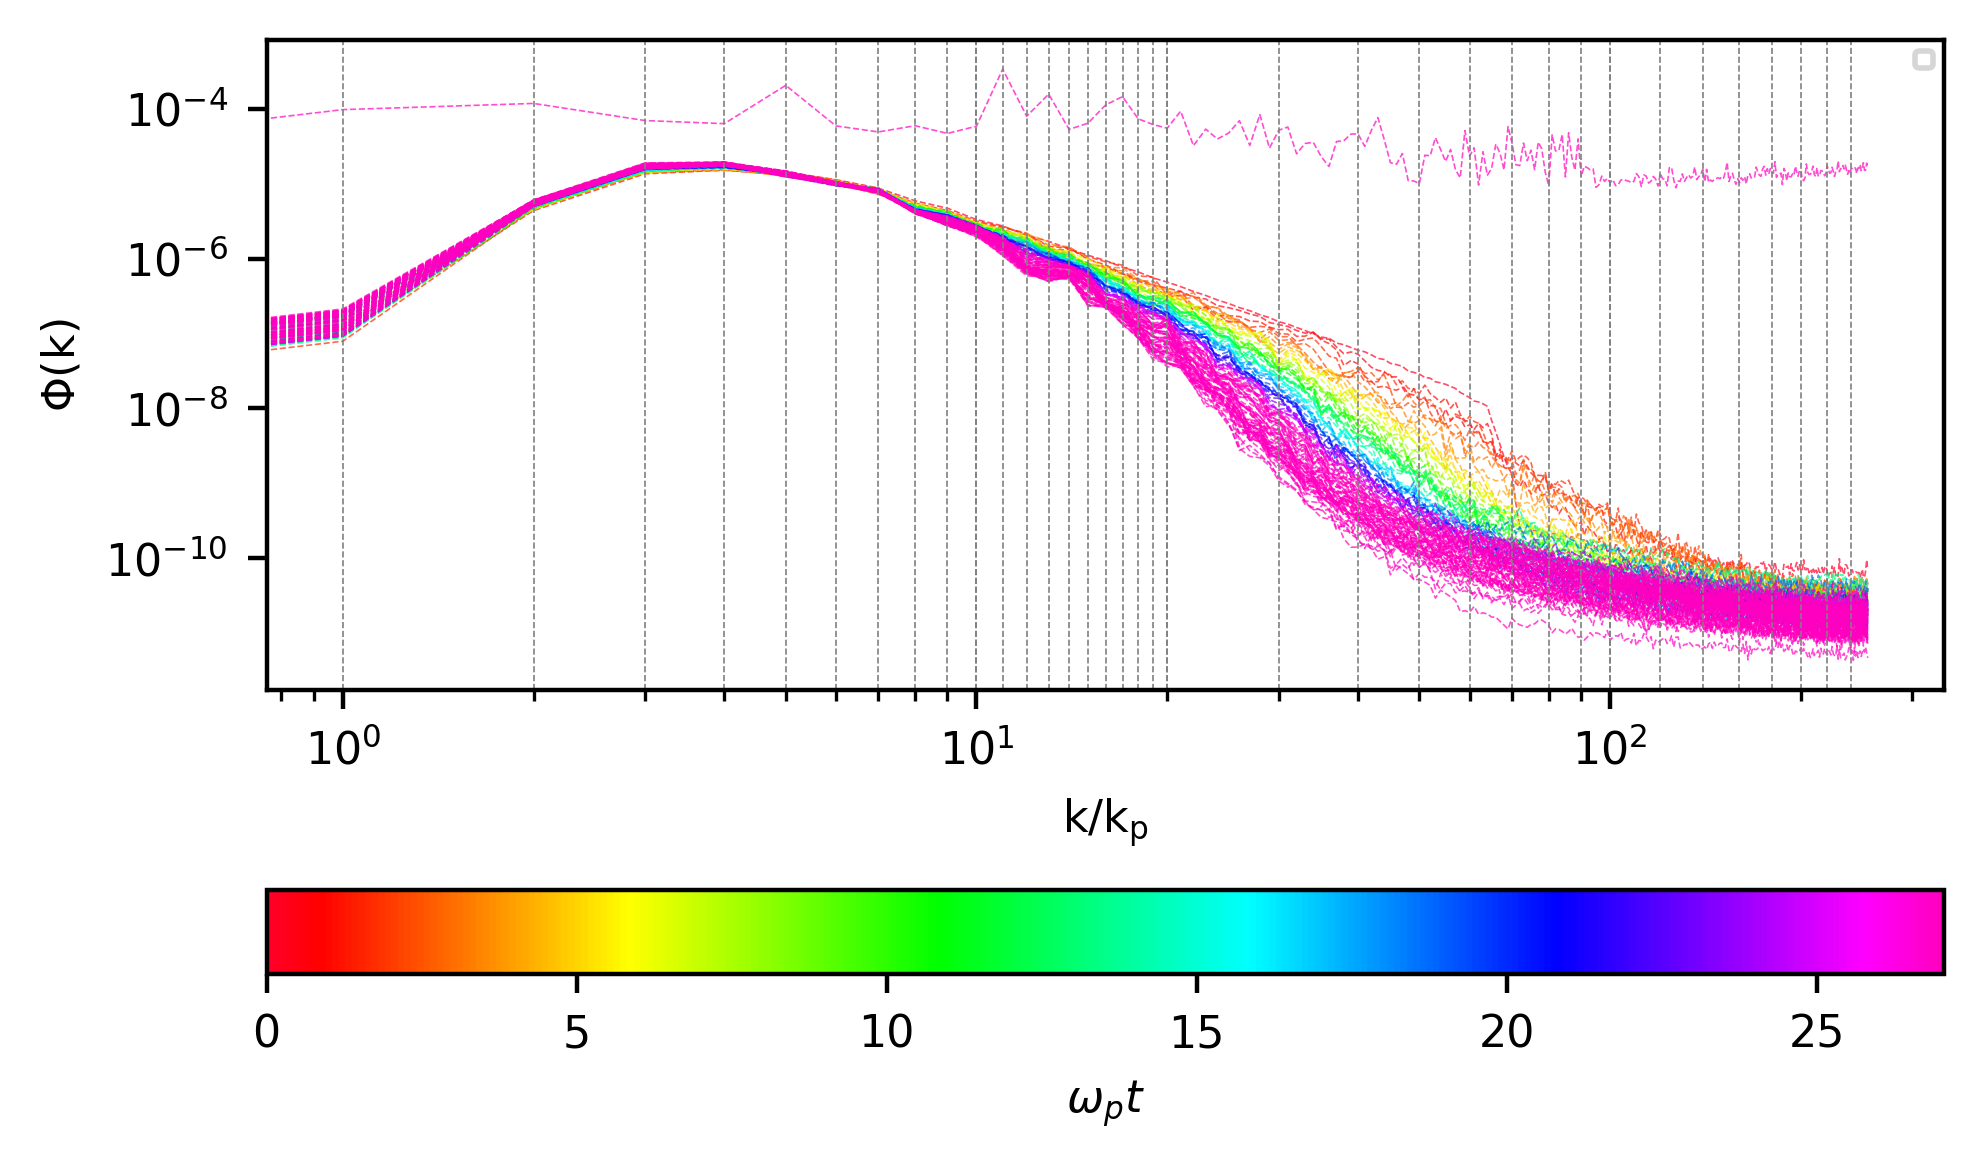

In [10]:
import matplotlib.cm as cm
from scipy.interpolate import interp1d
color_map = plt.cm.gist_rainbow
fig = plt.figure(figsize=[5, 3])
ax = fig.gca()

num_rows = 2
num_cols = 3

kp = 4

N = 512
L = 2 * np.pi

j = 0




variance_L10_uc25 = []
integral_L10_uc25 = []
polar_integral_L10_uc25 = []

# modes growth
energy_mode_L10_uc25 = []
coordx_mode_L10_uc25 = []

filtered_coordx_mode = []
filtered_energy_mode = []

for i in range(len(eta_series_L10_uc25)):
    eta = eta_series_L10_uc25[i]

    k, F_center, F_center_polar_integrated, F_center_polar, k_tile, kxp_tile, kyp_tile, theta_tile, theta, variance, integral, polar_integral, kx, ky = spectrum_integration(
        eta - np.mean(eta), N, L, CHECK=False)
    dk = k[1] - k[0]
    #print(k)
    if i == 0:

        indices1 = np.arange(0, np.where(k >= 1)[0][0], max(1, int(0.25 / dk)))
        indices10 = np.arange(np.where(k >= 1)[0][0], np.where(k >= 10)[0][0], max(1, int(1 / dk)))
        indices1020 = np.arange(np.where(k >= 10)[0][0], np.where(k > 20)[0][0], max(1, int(1 / dk)))
        indices100 = np.arange(np.where(k >= 10)[0][0], np.where(k > 100)[0][0], max(1, int(10/ dk)))
        indicesplus = np.arange(np.where(k >= 100)[0][0], len(k), max(1, int(20 / dk)))

        k_multiples = np.concatenate((indices1, indices10, indices1020 ,indices100, indicesplus))

        k_multiples = k_multiples.astype(int)
        # Obtener los valores de k y las energías correspondientes
        k_seleccionados = k[k_multiples]

    energias_correspondientes_L10_uc25 = F_center_polar_integrated[k_multiples]

    
    if i == 0:
        E0_both_L10_uc25 = np.sum(F_center_polar_integrated) * dk
        #print(type(indices_cada_diez))
        E0_nodes_both = F_center_polar_integrated[k_multiples]
        #E0_second_both =  F_center_polar_integrated[k_second]
    
    if i % 5 == 0:
        psd = ax.plot(k, F_center_polar_integrated, '--', color=plt.cm.get_cmap('gist_rainbow')(j), alpha=0.7, linewidth=0.3)
    
    
    energy_mode_L10_uc25.append(energias_correspondientes_L10_uc25.tolist())
    #coordx_mode.append(coordx.tolist())
    integral_L10_uc25.append(integral)
 
    j += 1

# plot where are the nodes

for km in k_seleccionados:
    plt.axvline(x=km, color='gray', linestyle='--', linewidth=0.3)
    
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(loc='upper right', fontsize=4)


color_values =  (np.array(time_L10_uc25)-time_L10_uc25[0])

# Now set the normalization with the correct range

norm = plt.Normalize(vmin=color_values.min(), vmax=color_values.max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])  

# Add the colorbar to the figure
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.2)

# Set colorbar label and other properties if needed
cbar.set_label('$\omega_{p} t$')


fig.tight_layout()
cbar.set_label('$\omega_{p} t$')
plt.xscale('log')
#plt.xlim([0,10])
#plt.ylim([10**-8,1])
plt.yscale('log')
plt.xlabel('$\mathdefault{k/k_{p}}$')
plt.ylabel('$\mathdefault{\Phi(k)}$')
fig.tight_layout()

In [11]:
# Cargar eta_series desde un archivo .npy
eta_series_uc75 = np.load('eta_series_kpHs0p16_uoc0p75.npy', allow_pickle=True)
print(eta_series_uc75.shape)

work_dir_uc75 = '/projects/DEIKE/nscapin/broadband/kpHs0p16_uoc0p75/'

# Leer el archivo de texto
data_uc75 = np.loadtxt(work_dir_uc75+'eta/global_int.out')

# Obtener la segunda columna
istep_c_uc75 =data_uc75[:, 1]
#print(istep_c.shape[0])
time_uc75 = data_uc75[:,0] 
#print(time)

(384, 1024, 1024)


No handles with labels found to put in legend.


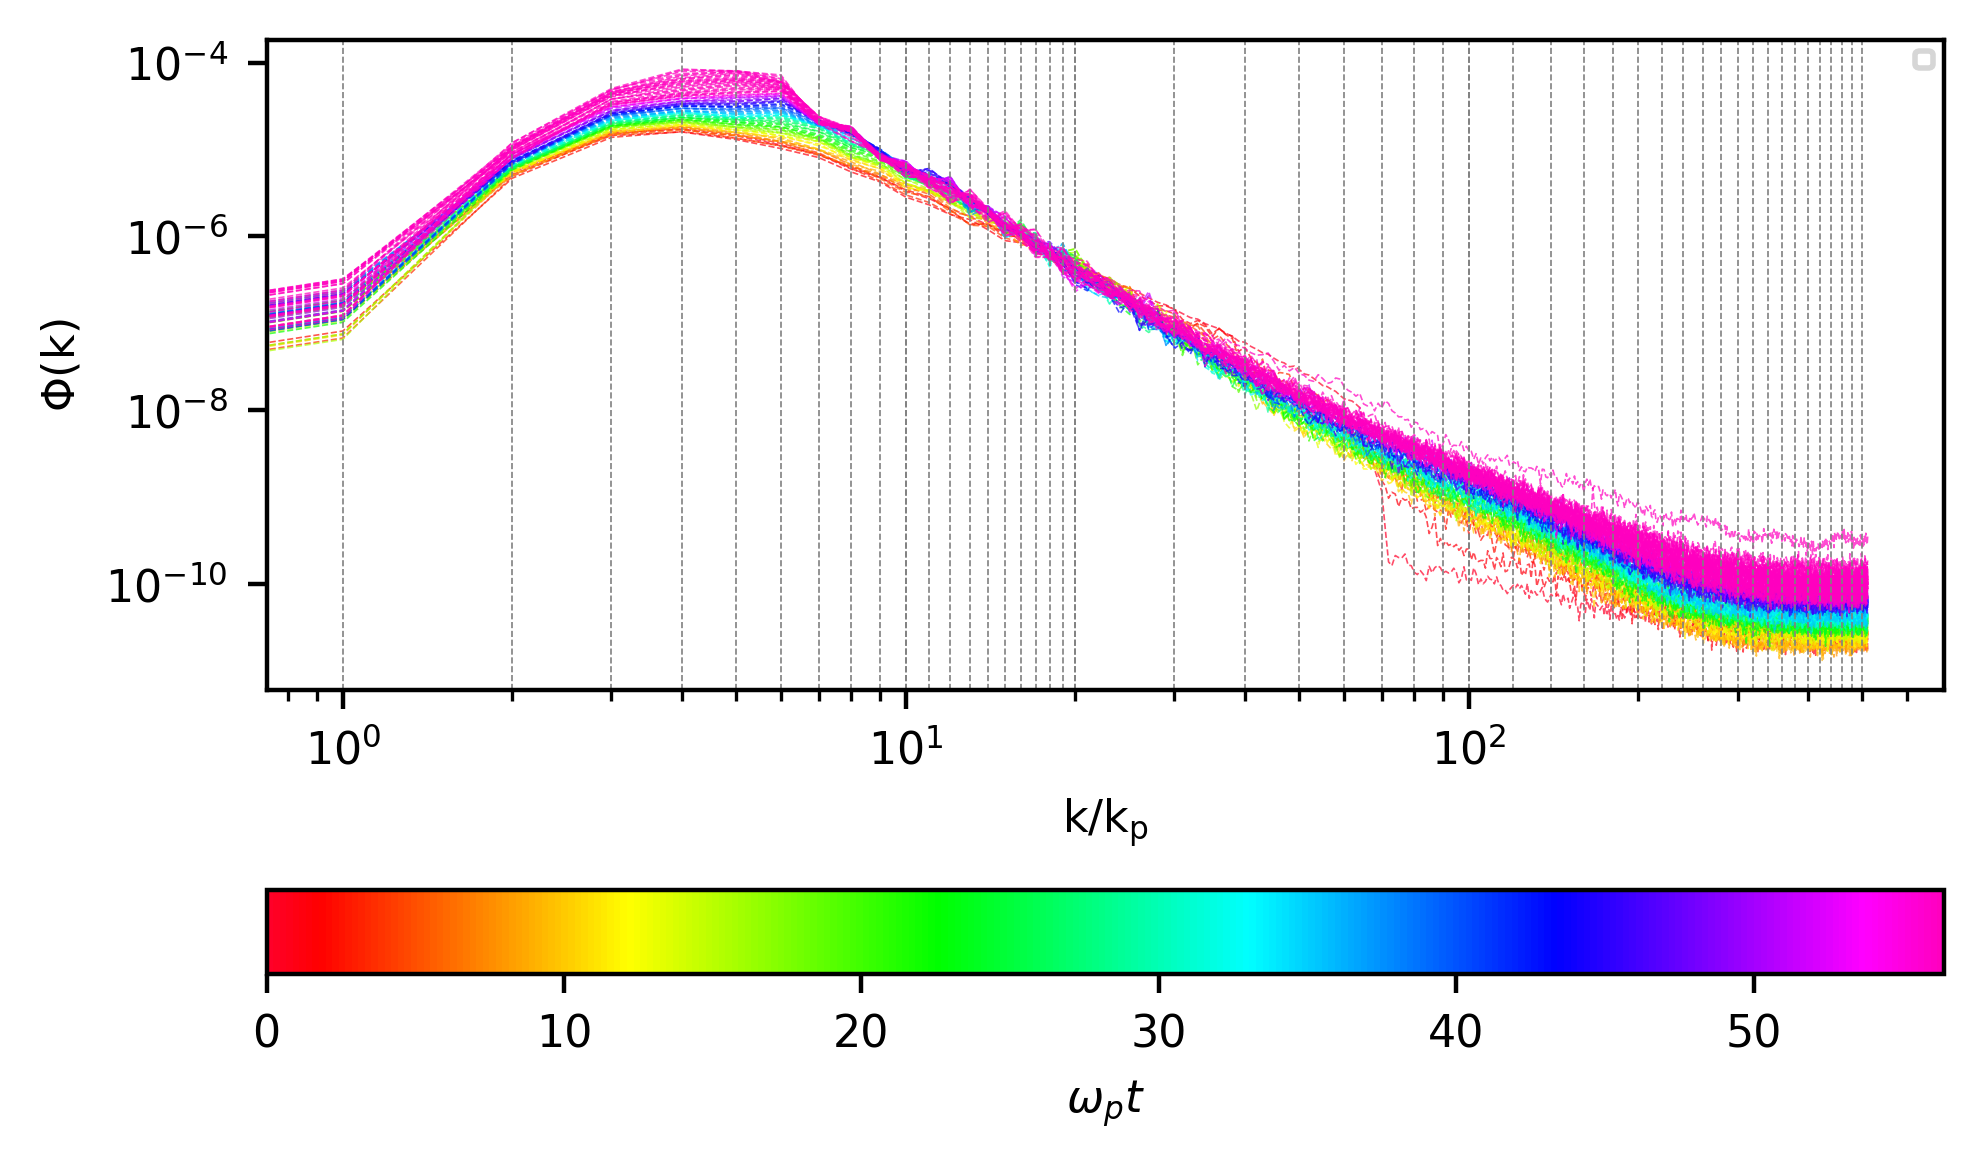

In [12]:
import matplotlib.cm as cm
from scipy.interpolate import interp1d
color_map = plt.cm.gist_rainbow
fig = plt.figure(figsize=[5, 3])
ax = fig.gca()

num_rows = 2
num_cols = 3

kp = 4

N = 1024
L = 2 * np.pi

j = 0

variance_uc75 = []
integral_uc75 = []
polar_integral_uc75 = []

# modes growth
energy_mode_uc75 = []
coordx_mode_uc75 = []

filtered_coordx_mode = []
filtered_energy_mode = []

for i in range(len(eta_series_uc75)):
    eta = eta_series_uc75[i]

    k, F_center, F_center_polar_integrated, F_center_polar, k_tile, kxp_tile, kyp_tile, theta_tile, theta, variance, integral, polar_integral, kx, ky = spectrum_integration(
        eta - np.mean(eta), N, L, CHECK=False)
    dk = k[1] - k[0]
    #print(k)
    if i == 0:

        indices1 = np.arange(0, np.where(k >= 1)[0][0], max(1, int(0.25 / dk)))
        indices10 = np.arange(np.where(k >= 1)[0][0], np.where(k >= 10)[0][0], max(1, int(1 / dk)))
        indices1020 = np.arange(np.where(k >= 10)[0][0], np.where(k > 20)[0][0], max(1, int(1 / dk)))
        indices100 = np.arange(np.where(k >= 10)[0][0], np.where(k > 100)[0][0], max(1, int(10/ dk)))
        indicesplus = np.arange(np.where(k >= 100)[0][0], len(k), max(1, int(20 / dk)))

        k_multiples = np.concatenate((indices1, indices10, indices1020 ,indices100, indicesplus))

        k_multiples = k_multiples.astype(int)
        # Obtener los valores de k y las energías correspondientes
        k_seleccionados = k[k_multiples]

    energias_correspondientes_uc75 = F_center_polar_integrated[k_multiples]

    
    if i == 0:
        E0_both_uc75 = np.sum(F_center_polar_integrated) * dk
        #print(type(indices_cada_diez))
        E0_nodes_both = F_center_polar_integrated[k_multiples]
        #E0_second_both =  F_center_polar_integrated[k_second]
    
    if i % 5 == 0:
        psd = ax.plot(k, F_center_polar_integrated, '--', color=plt.cm.get_cmap('gist_rainbow')(j), alpha=0.7, linewidth=0.3)
    
    
    energy_mode_uc75.append(energias_correspondientes_uc75.tolist())
    #coordx_mode.append(coordx.tolist())
    integral_uc75.append(integral)
 
    j += 1

# plot where are the nodes

for km in k_seleccionados:
    plt.axvline(x=km, color='gray', linestyle='--', linewidth=0.3)
    
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(loc='upper right', fontsize=4)


color_values =  (np.array(time_uc75)-time_uc75[0])

# Now set the normalization with the correct range

norm = plt.Normalize(vmin=color_values.min(), vmax=color_values.max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])  

# Add the colorbar to the figure
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.2)

# Set colorbar label and other properties if needed
cbar.set_label('$\omega_{p} t$')


fig.tight_layout()
cbar.set_label('$\omega_{p} t$')
plt.xscale('log')
#plt.xlim([0,10])
#plt.ylim([10**-8,1])
plt.yscale('log')
plt.xlabel('$\mathdefault{k/k_{p}}$')
plt.ylabel('$\mathdefault{\Phi(k)}$')
fig.tight_layout()

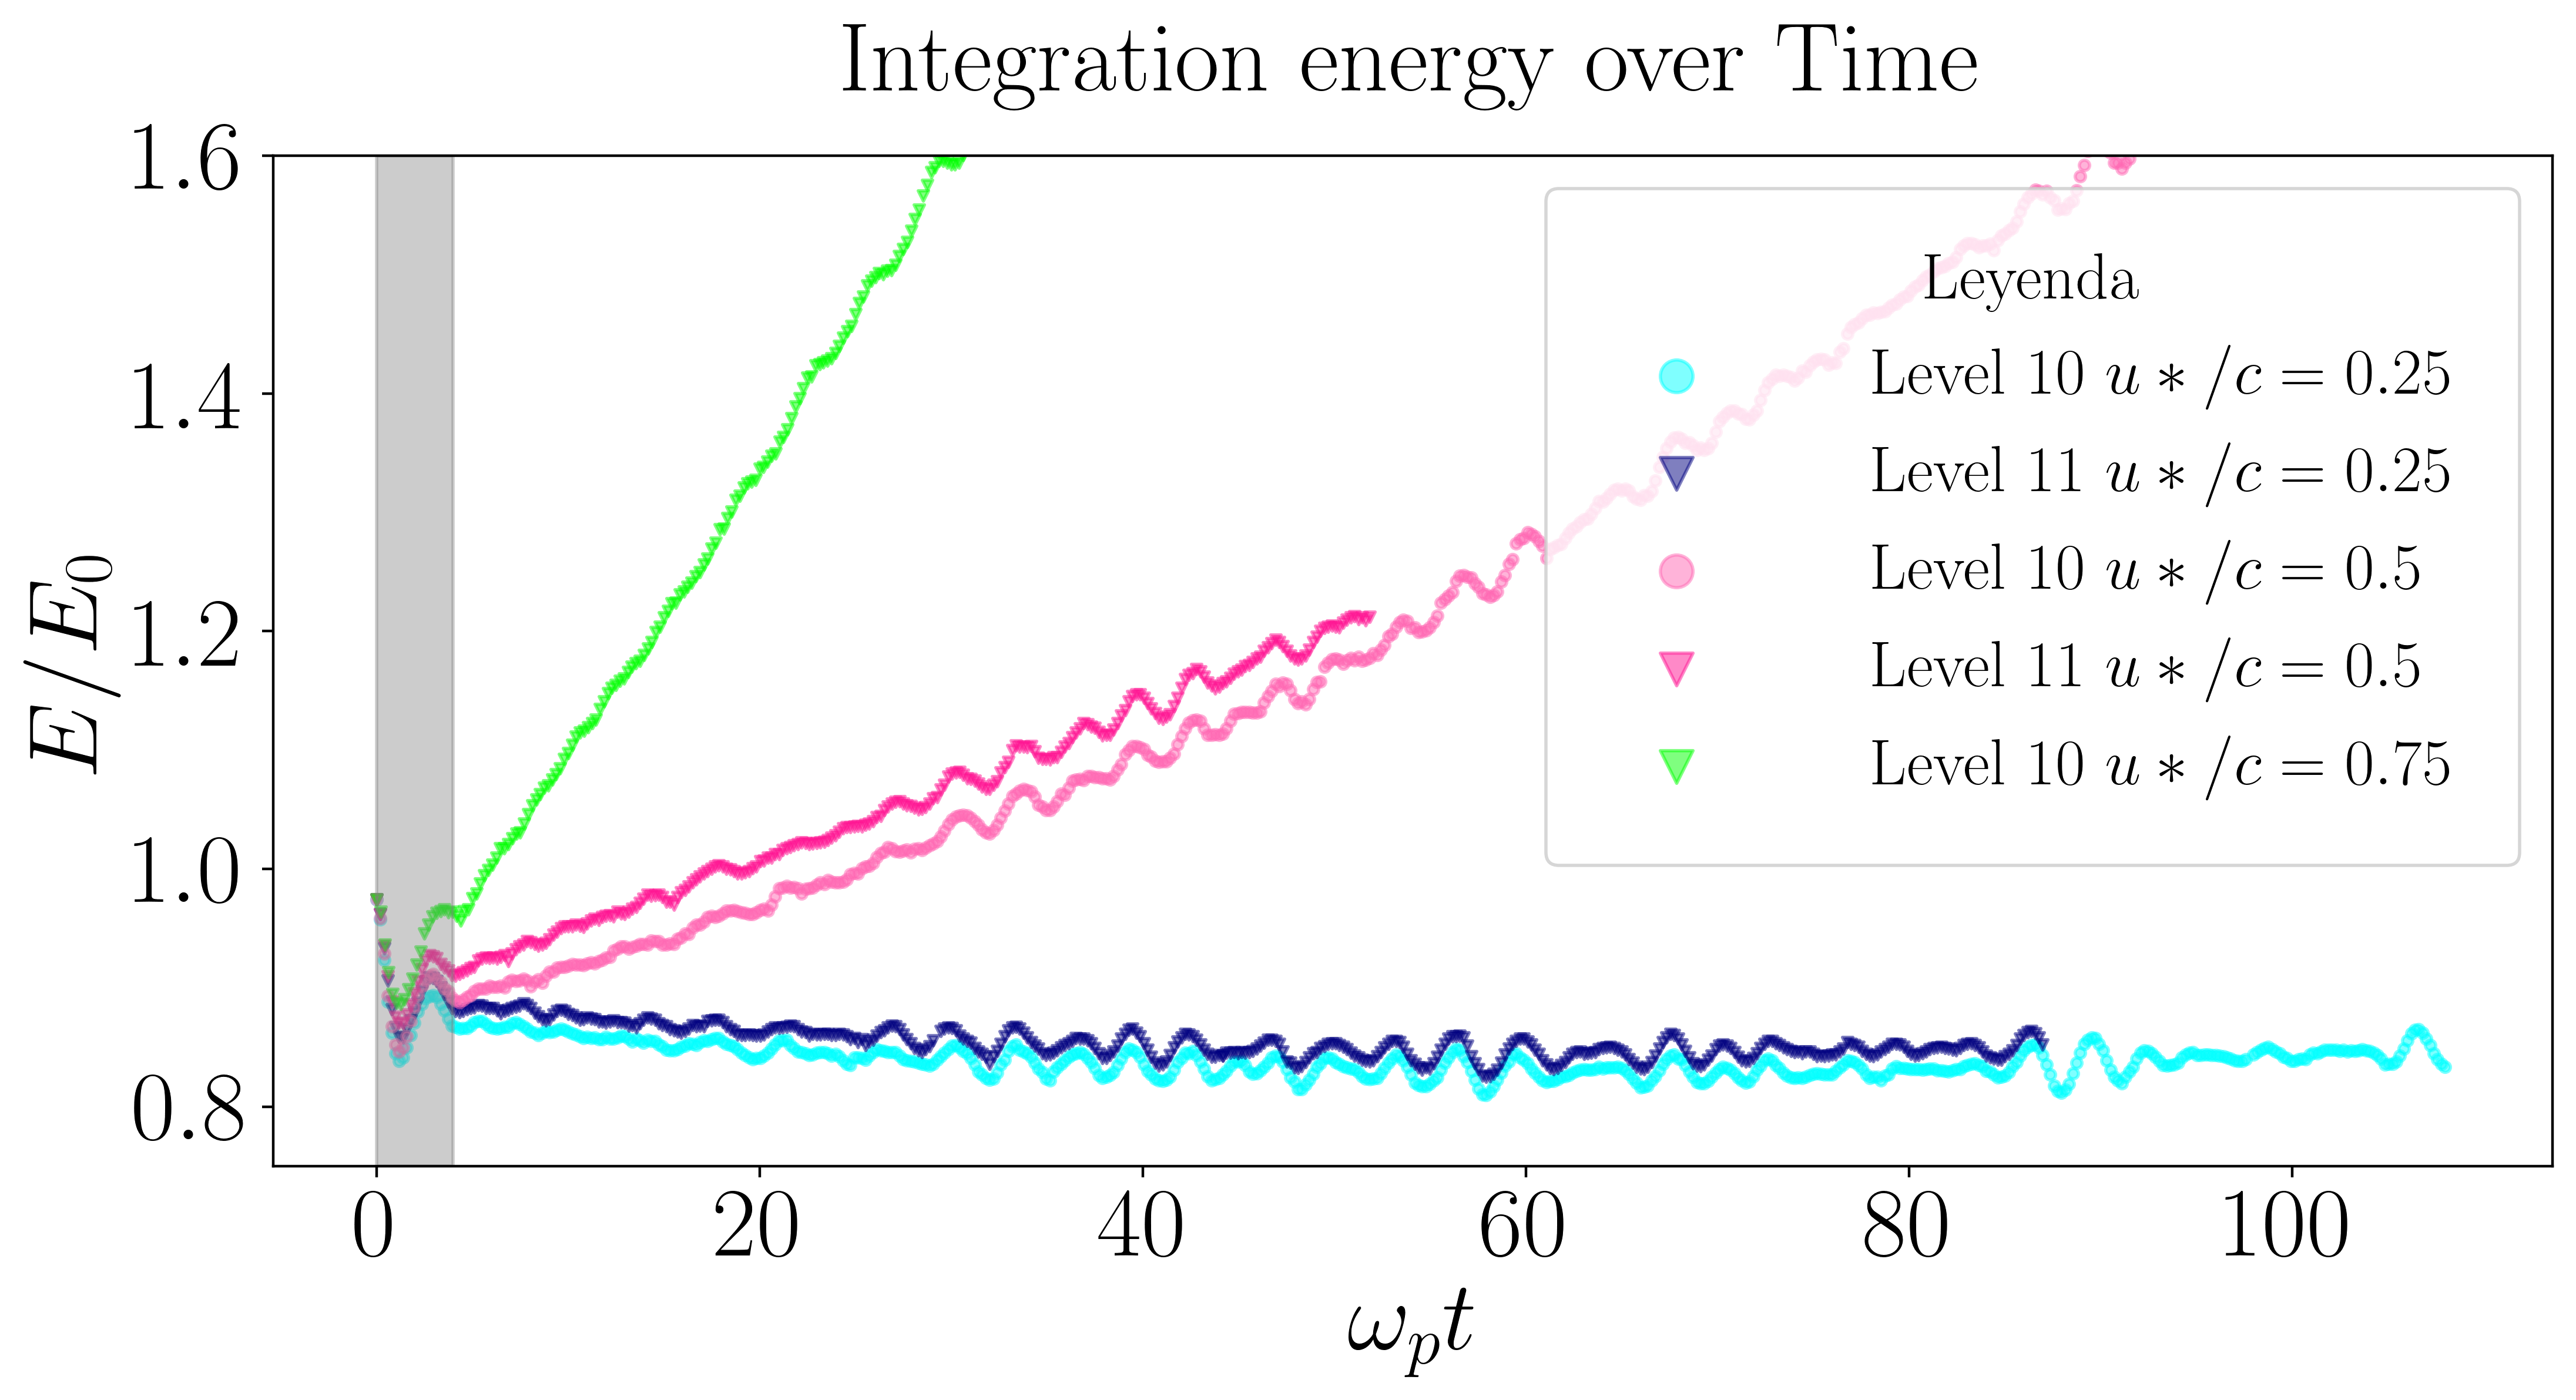

In [13]:
omegap_025 = np.sqrt(4*4)
omegap_05 = np.sqrt(1*4)
omegap_075 = np.sqrt(0.5*4)
tiempo_L10 = []
tiempo_L11 = []
tiempo_L10_uc25 = []
tiempo_L11_uc25 = []
tiempo_uc75 = []


plt.rcParams.update({'legend.fontsize': 'x-Large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 30,
         'axes.titlesize':30,
         'xtick.labelsize':30,
         'ytick.labelsize':30,
    'font.family': 'STIXGeneral',  # Use 'Comic Sans MS' or 'Helvetica' here as needed
    'axes.titleweight': 'normal',
    'axes.labelweight': 'normal',
    'text.usetex': True, # Enable LaTeX rendering
})



# Ahora crea tu figura y ejes
fig, ax = plt.subplots(figsize=(11, 6))  # Usa el tamaño de figura definido en los parámetros


for i in range(len(eta_series_L10)):
    tiempo_L10.append(omegap*(time_L10[i]-time_L10[0]))

tiempo_L10 = np.array(tiempo_L10)

for i in range(len(eta_series_L11)):
    tiempo_L11.append(omegap*(time_L11[i]-time_L11[0]))    

tiempo_L11 = np.array(tiempo_L11)    
    
for i in range(len(eta_series_L10_uc25)):
    tiempo_L10_uc25.append(omegap_025*(time_L10_uc25[i]-time_L10_uc25[0]))   
    
tiempo_L10_uc25 = np.array(tiempo_L10_uc25)   

for i in range(len(eta_series_L11_uc25)):
    tiempo_L11_uc25.append(omegap_025*(time_L11_uc25[i]-time_L11_uc25[0]))   
tiempo_L11_uc25 = np.array(tiempo_L11_uc25)   


for i in range(len(eta_series_uc75)):
    tiempo_uc75.append(omegap_075*(time_uc75[i]-time_uc75[0]))
tiempo_uc75 = np.array(tiempo_uc75)  


# Define los colores y marcadores
color_eta = 'blue'
color_polar = 'green'
color_integral = 'red'
marker_L11 = 'v'  # Marker para Level 11
marker_L10 = 'o'  # Marker para Level 10


#print(integral_L10_uc25.shape)
#print(tiempo_L10_uc25, np.array(integral_L10_uc25),type(tiempo_L10_uc25), type(integral_L10_uc25/E0_both_L10_uc25) )

plt.scatter(tiempo_L10_uc25, np.array(integral_L10_uc25/E0_both_L10_uc25), s=10, color='aqua' , marker=marker_L10, label=r'Level 10 $u*/c= 0.25$', alpha=0.5)
plt.scatter(tiempo_L11_uc25, np.array(integral_L11_uc25/E0_both_L11_uc25), s=10, color='navy', marker=marker_L11, label=r'Level 11 $u*/c= 0.25$', alpha=0.5)
plt.scatter(tiempo_L10, np.array(integral_L10/E0_both_L10), s=10, color='hotpink', marker=marker_L10, label=r'Level 10 $u*/c= 0.5$', alpha=0.5)
plt.scatter(tiempo_L11, np.array(integral_L11/E0_both_L11), s=10, color='deeppink', marker=marker_L11, label=r'Level 11 $u*/c= 0.5$', alpha=0.5)
plt.scatter(tiempo_uc75, np.array(integral_uc75/E0_both_uc75), s=10, color='lime', marker=marker_L11, label=r'Level 10 $u*/c= 0.75$', alpha=0.5)

plt.axvspan(0,4, alpha=0.4, color='grey')
# Ajusta la leyenda y etiquetas
# Añadiendo la leyenda con configuraciones adicionales
legend = ax.legend(loc='upper right',  # Posición de la leyenda
                   frameon=True,     # Desactivar el borde de la leyenda
                   fontsize=20,       # Tamaño de fuente de los textos de la leyenda
                   title='Leyenda',   # Título de la leyenda
                   title_fontsize=20, # Tamaño de fuente del título de la leyenda
                   shadow=False,       # Sombra para la leyenda
                   borderpad=1,       # Espacio alrededor del contenido de la leyenda
                   handletextpad=2,   # Espacio entre el marcador y el texto
                   columnspacing=1,   # Espacio entre columnas
                   ncol=1)            # Número de columnas

ax.set_xlabel(r'$\omega_p t$')
ax.set_ylabel(r'$E/E_{0}$')
ax.set_title('Integration energy over Time', pad =20)

#plt.title('Comparison of Variance, Polar Integration, and Integration over Time', fontsize=10)
for handle in legend.legendHandles:
    handle.set_sizes([100])  # Tamaño del símbolo en la leyenda
    
#lgnd.legendHandles[5]._sizes = [30]
plt.ylim([0.75,1.6])
#plt.xlim([-0.3,10])

# Muestra la gráfica
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para que la subtrama se ajuste al área de la figura
plt.show()